### Autograd Package helps in calculating Gradients

In [68]:
import torch

x = torch.randn(3, requires_grad=True)
print(x)  


tensor([ 1.3505,  0.9042, -0.7476], requires_grad=True)


---------

A Basic Neuron

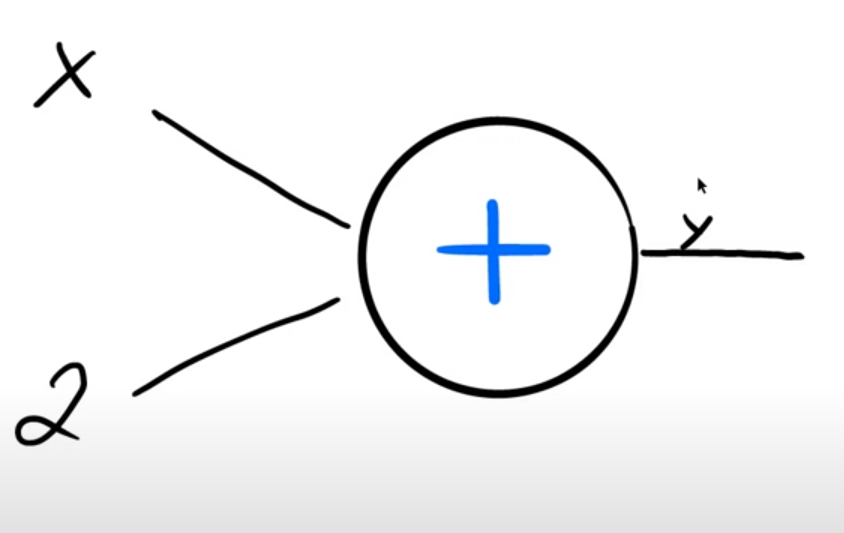


In above, we have output y, two inputs x and 2, and the operation is addition '+' <br>
We can calculate gradient using above technique called backpropogation <br>

Steps <br>
1. Calculate forward path (output y)
2. Since we had specified that x will require a gradient, pytorch automatically creates a function which helps in backpropogation and helps calculate gradient

----
Addition

In [69]:
y = x + 2
print(y)

# In above, clearly y is created as a result of an operation, so it has grad_fn
# the name of the function is AddBackward0 

tensor([3.3505, 2.9042, 1.2524], grad_fn=<AddBackward0>)


-----
Multiplication

In [70]:
# Similarly,

z = y*y*2
print(z)

# In above, clearly z is created as a result of an operation, so it has grad_fn
# the name of the function is MulBackward0

tensor([22.4515, 16.8692,  3.1369], grad_fn=<MulBackward0>)


In [71]:
z = z.mean()
print(z)

# In above, clearly z is created as a result of an operation, so it has grad_fn
# the name of the function is MeanBackward0

tensor(14.1525, grad_fn=<MeanBackward0>)


Steps (Continued) <br>
1. Calculate forward path (output y)
2. Since we had specified that x will require a gradient, pytorch automatically creates a function which helps in backpropogation and helps calculate gradient
3. back propogate using backward() function 
4. Find the gradient using x.grad


In [72]:
# Now, let's backpropagate
z.backward() # dz/dx
print(x)
print(x.grad)


tensor([ 1.3505,  0.9042, -0.7476], requires_grad=True)
tensor([4.4673, 3.8723, 1.6698])


-----
Not specifying grad requirement leads to errors

In [73]:
# Suppose we didnt specify requires_grad=True, then
x = torch.randn(3, requires_grad=False)
y = x + 2
z = y*y*2
z = z.mean()
z.backward() # dz/dx
print(x.grad)

# It throws a runtime error, because we didnt specify requires_grad=True


RuntimeError: element 0 of tensors does not require grad and does not have a grad_fn

In [75]:
# The value of z is a scalar, so we can backpropagate through it without specifying any arguments to backward()
# But what if z was a vector, then we need to specify a vector argument to backward()

# it means we have multiple values for z, and we need to specify which one to backpropagate
# so we need to specify a vector value for z.backward()

x = torch.randn(3, requires_grad=True)
y = x + 2
z = y*y*2
print(z)
v = torch.tensor([0.1, 1.0, 0.001], dtype=torch.float32)
z.backward() # dz/dx


tensor([ 5.1947, 29.2177, 12.3928], grad_fn=<MulBackward0>)


RuntimeError: grad can be implicitly created only for scalar outputs

In [76]:
# To specify which value of z to backpropagate, we need to specify a vector value for z.backward()

v = torch.tensor([0.1, 1.0, 0.001], dtype=torch.float32)
z.backward(v) # dz/dx
print(x.grad)


tensor([6.4465e-01, 1.5289e+01, 9.9570e-03])


----


In [77]:
# We might be updating the weights of the model in the training phase, but not in the inference phase. In this case we dont want pytorch to track the gradients
# If we dont want pytorch to track the gradients, we can use following methods
# 1. x.requires_grad_(False)
# 2. x.detach()
# 3. with torch.no_grad():

In [78]:
# Method 1
x = torch.randn(3, requires_grad=True)
print(x.requires_grad)
y = x.detach()
print(y.requires_grad)

True
False


In [79]:
# Method 2
x = torch.randn(3, requires_grad=True)  
print(x.requires_grad)

x.requires_grad_(False)
print(x.requires_grad)

True
False


In [80]:
# Method 3
x = torch.randn(3, requires_grad=True)
print(x.requires_grad)
with torch.no_grad():
    y = x + 2
    print(y.requires_grad) 

True
False


----
Training Examples

In [81]:
import torch

weights = torch.ones(4, requires_grad=True)

for epoch in range(1):
    model_output = (weights*3).sum()
    model_output.backward()
    print(weights.grad)

tensor([3., 3., 3., 3.])


In [82]:
import torch

weights = torch.ones(4, requires_grad=True)

for epoch in range(2):
    model_output = (weights*3).sum()
    model_output.backward()
    print(weights.grad)
    

tensor([3., 3., 3., 3.])
tensor([6., 6., 6., 6.])


In [83]:
import torch

weights = torch.ones(4, requires_grad=True)

for epoch in range(3):
    model_output = (weights*3).sum()
    model_output.backward()
    print(weights.grad)


# Clearing the gradients are accumulated in the weights.grad as we iterate through the loop more and more times

# To prevent this, we need to reset the gradients to zero, otherwise they will accumulate

tensor([3., 3., 3., 3.])
tensor([6., 6., 6., 6.])
tensor([9., 9., 9., 9.])


In [84]:
import torch

weights = torch.ones(4, requires_grad=True)

for epoch in range(3):
    model_output = (weights*3).sum()
    model_output.backward()
    print(weights.grad)
    # Clearing the gradients are accumulated in the weights.grad as we iterate through the loop more and more times
    # To prevent this, we need to reset the gradients to zero, otherwise they will accumulate
    weights.grad.zero_()

tensor([3., 3., 3., 3.])
tensor([3., 3., 3., 3.])
tensor([3., 3., 3., 3.])


---